<a href="https://colab.research.google.com/github/AzkaHasan/diabetes-dataset-python-logistic-regression/blob/main/Diabetes_on_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
data = pd.read_csv("diabetes_dataset.csv")
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [13]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


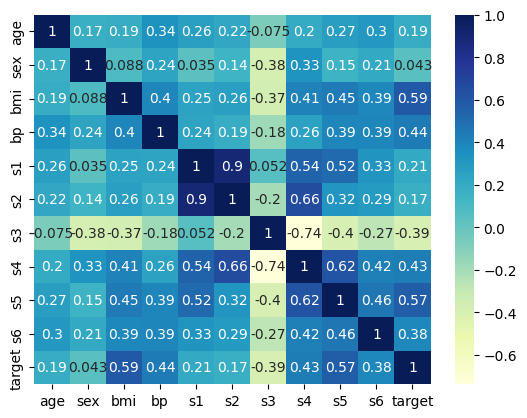

In [14]:
mat=data.corr()
sns.heatmap(mat,annot=True, cmap="YlGnBu")
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
# Step 1: Create binary target (like in R using median split)
median_target = data["target"].median()
data["target"] = np.where(data["target"] > median_target, 1, 0)

# Step 2: Train/test split (80/20)
X = data.drop(columns=["target"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)



from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

# Step 3: Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred_prob = model.predict_proba(X_test)[:,1]  # probability of class 1
y_pred_class = (y_pred_prob > 0.5).astype(int)  # threshold at 0.5

# Step 5: Accuracy & Evaluation
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_class))

Accuracy: 0.7865168539325843

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        45
           1       0.77      0.82      0.79        44

    accuracy                           0.79        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.79      0.79      0.79        89


Confusion Matrix:
 [[34 11]
 [ 8 36]]


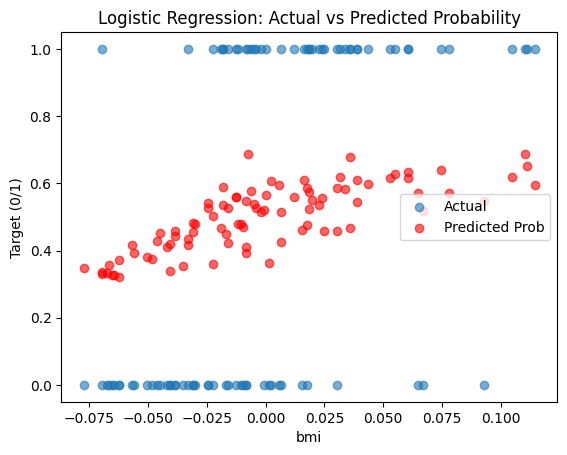

In [22]:
X_feature = X_test["bmi"]
y_actual = y_test
y_prob = y_pred_prob

plt.scatter(X_feature, y_actual, label="Actual", alpha=0.6)
plt.scatter(X_feature, y_prob, color="red", label="Predicted Prob", alpha=0.6)
plt.xlabel("bmi")
plt.ylabel("Target (0/1)")
plt.legend()
plt.title("Logistic Regression: Actual vs Predicted Probability")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


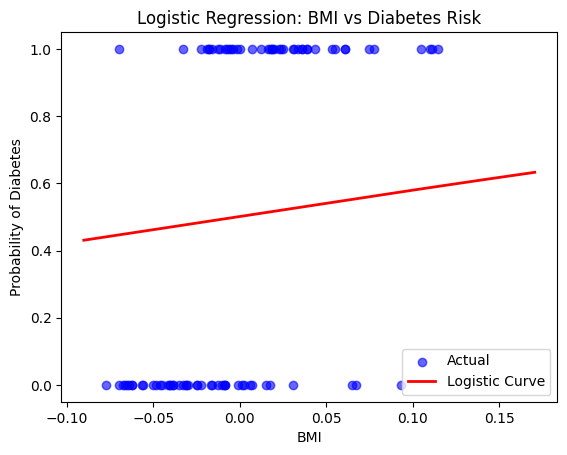

In [24]:


# Example: Use only BMI as predictor
X_bmi = X_train[["bmi"]]   # training feature
y = y_train

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_bmi, y)

# Create smooth range of BMI values
bmi_range = np.linspace(X_bmi.min(), X_bmi.max(), 300).reshape(-1, 1)

# Predict probabilities for the smooth curve
y_prob_curve = log_reg.predict_proba(bmi_range)[:, 1]

# Plot scatter (actual data)
plt.scatter(X_test["bmi"], y_test, color="blue", alpha=0.6, label="Actual")

# Plot smooth logistic curve
plt.plot(bmi_range, y_prob_curve, color="red", linewidth=2, label="Logistic Curve")

plt.xlabel("BMI")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression: BMI vs Diabetes Risk")
plt.legend()
plt.show()


In [25]:
# model saving
import pickle
pickle.dump(model,open("model.pkl","wb"))
{}

{}